## Support Vector Machine implementation on 220 Band AVIRIS Hyperspectral Image of Indian Pine Test Site 3 

## Steps :
## --> 1. Load Dataset 
## --> 2. Data Preprocessing (Converting from 3D to 2D)
## --> 3. Feature Extraction (SPCA) / Component Selection (16)
## --> 4. Data Cleaning (Removing 0 class) 
## --> 5. Normalization (Z Score Normalization)
## --> 6. Train Test Splitting (70% Train , 30% Test)
## --> 7. Apply Grid search on train dataset and Find best values for hyperparameter
## --> 8. Find Training Accuracy
## --> 9. Testing Accuracy

# 1. Load Dataset

### Import Library

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import math
%matplotlib inline

### read .lan file

In [2]:
#import the package
from spectral import *

In [3]:
data = open_image('D:\Academic Thesis Papers\Thesis Report 9\sample-data-master\92AV3C.lan')

In [4]:
data

	Data Source:   'D:\Academic Thesis Papers\Thesis Report 9\sample-data-master\92AV3C.lan'
	# Rows:            145
	# Samples:         145
	# Bands:           220
	Interleave:        BIL
	Quantization:  16 bits
	Data format:     int16

In [5]:
data.shape

(145, 145, 220)

In [6]:
data[:,:,:]

array([[[3172, 4142, 4506, ..., 1020, 1020, 1005],
        [3348, 4266, 4502, ..., 1029, 1020, 1000],
        [3687, 4266, 4421, ..., 1030, 1016, 1009],
        ...,
        [3341, 3890, 4320, ..., 1021, 1015, 1025],
        [3170, 4130, 4320, ..., 1024, 1020, 1011],
        [3172, 3890, 4316, ..., 1034, 1016, 1015]],

       [[3344, 4388, 4334, ..., 1030, 1006, 1015],
        [3515, 4264, 4592, ..., 1039, 1015, 1020],
        [3518, 4268, 4423, ..., 1026, 1015, 1020],
        ...,
        [3859, 4512, 4605, ..., 1035, 1015,  996],
        [3686, 4264, 4690, ..., 1012, 1020, 1014],
        [3512, 4268, 4597, ..., 1019, 1016, 1010]],

       [[3512, 4146, 4416, ..., 1029, 1025, 1010],
        [3344, 4389, 4416, ..., 1021, 1011, 1000],
        [3512, 4273, 4420, ..., 1033, 1010, 1014],
        ...,
        [3341, 4266, 4509, ..., 1025, 1010, 1005],
        [3344, 4262, 4496, ..., 1029, 1020, 1005],
        [3510, 4142, 4230, ..., 1025, 1011, 1010]],

       ...,

       [[3324, 3728, 400

### read ground truth data

In [7]:
ground_truth_data = open_image('D:\Academic Thesis Papers\Thesis Report 9\sample-data-master\92AV3GT.GIS').read_band(0)

In [8]:
ground_truth_data

array([[3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

# 2. Data Preprocessing (Converting from 3D to 2D)

### Prepare dataset by making the band number as features and pixel number as rows

In [9]:
dictionary = dict()
value = list()

for z in range(220):
    count = z + 1
    key = 'band_' + str(count)
    
    for x in range(145):
        for y in range(145):
            value.append(data[x,y,z])
    
    dictionary[key] = value
    value = list()
            
dictionary

{'band_1': [3172,
  3348,
  3687,
  3517,
  3514,
  3343,
  3343,
  3343,
  3346,
  3522,
  3858,
  3514,
  3343,
  3343,
  3343,
  3343,
  3343,
  3343,
  3346,
  3514,
  3341,
  3172,
  3343,
  3341,
  3167,
  3004,
  3514,
  3341,
  3170,
  3170,
  3170,
  3167,
  3002,
  3338,
  2996,
  3004,
  3514,
  3343,
  3346,
  3517,
  3517,
  3514,
  3348,
  3687,
  3514,
  3346,
  3514,
  3343,
  3346,
  3514,
  3343,
  3343,
  3343,
  3348,
  3687,
  3511,
  3172,
  3346,
  3514,
  3346,
  3519,
  3690,
  3690,
  3690,
  3693,
  3858,
  3517,
  3517,
  3511,
  3170,
  3175,
  3514,
  3343,
  3343,
  3341,
  3172,
  3341,
  3167,
  2999,
  3170,
  3162,
  2657,
  3170,
  3167,
  3002,
  3341,
  3172,
  3338,
  2999,
  3170,
  3167,
  2996,
  2999,
  3167,
  3002,
  3341,
  3178,
  3690,
  3687,
  3517,
  3517,
  3514,
  3343,
  3346,
  3511,
  3175,
  3514,
  3343,
  3343,
  3343,
  3341,
  3172,
  3343,
  3346,
  3511,
  3172,
  3341,
  3170,
  3178,
  3685,
  3343,
  3341,
  3175,
  3517

In [10]:
dictionary['band_1']

[3172,
 3348,
 3687,
 3517,
 3514,
 3343,
 3343,
 3343,
 3346,
 3522,
 3858,
 3514,
 3343,
 3343,
 3343,
 3343,
 3343,
 3343,
 3346,
 3514,
 3341,
 3172,
 3343,
 3341,
 3167,
 3004,
 3514,
 3341,
 3170,
 3170,
 3170,
 3167,
 3002,
 3338,
 2996,
 3004,
 3514,
 3343,
 3346,
 3517,
 3517,
 3514,
 3348,
 3687,
 3514,
 3346,
 3514,
 3343,
 3346,
 3514,
 3343,
 3343,
 3343,
 3348,
 3687,
 3511,
 3172,
 3346,
 3514,
 3346,
 3519,
 3690,
 3690,
 3690,
 3693,
 3858,
 3517,
 3517,
 3511,
 3170,
 3175,
 3514,
 3343,
 3343,
 3341,
 3172,
 3341,
 3167,
 2999,
 3170,
 3162,
 2657,
 3170,
 3167,
 3002,
 3341,
 3172,
 3338,
 2999,
 3170,
 3167,
 2996,
 2999,
 3167,
 3002,
 3341,
 3178,
 3690,
 3687,
 3517,
 3517,
 3514,
 3343,
 3346,
 3511,
 3175,
 3514,
 3343,
 3343,
 3343,
 3341,
 3172,
 3343,
 3346,
 3511,
 3172,
 3341,
 3170,
 3178,
 3685,
 3343,
 3341,
 3175,
 3517,
 3517,
 3517,
 3517,
 3519,
 3690,
 3693,
 3858,
 3519,
 3687,
 3522,
 3861,
 3687,
 3517,
 3514,
 3346,
 3514,
 3338,
 3002,
 3341,

### Prepare ground truth data as target data

In [11]:
ground_truth_data

array([[3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

In [12]:
ground_truth_data.shape

(145, 145)

In [13]:
# number of unique values and their count

diff = dict()

for i in range(145):
    for j in range(145):
        if ground_truth_data[i,j] not in diff:
            diff[ground_truth_data[i,j]] = 1
        else:
            diff[ground_truth_data[i,j]] = diff[ground_truth_data[i,j]] + 1
diff

{3: 834,
 0: 10659,
 15: 380,
 11: 2468,
 12: 614,
 5: 497,
 10: 968,
 14: 1294,
 16: 95,
 2: 1434,
 4: 234,
 8: 489,
 6: 747,
 9: 20,
 1: 54,
 7: 26,
 13: 212}

NB : So there are total 17 classes in this ground truth data

In [14]:
target = ground_truth_data.reshape(21025,)
target

array([3, 3, 3, ..., 0, 0, 0], dtype=int8)

In [15]:
print(target.shape)
print(target.ndim)

(21025,)
1


### making df

In [16]:
df = pd.DataFrame(dictionary)

In [17]:
df

band_1  band_2  band_3  band_4  band_5  band_6  band_7  band_8  band_9  \
0        3172    4142    4506    4279    4782    5048    5213    5106    5053   
1        3348    4266    4502    4426    4853    5249    5352    5353    5347   
2        3687    4266    4421    4498    5019    5293    5438    5427    5383   
3        3517    4258    4603    4493    4958    5234    5417    5355    5349   
4        3514    4018    4675    4417    4886    5117    5215    5096    5098   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
21020    3329    3987    4011    4023    4201    4377    4418    4248    4180   
21021    3494    4104    4024    3880    4210    4377    4413    4174    4229   
21022    3153    3864    4282    3889    4310    4372    4375    4208    4096   
21023    3155    4104    4109    4027    4139    4318    4413    4174    4140   
21024    3323    3860    4197    3952    4148    4279    4375    4225    3988   

       band_10  ...  band_211  band_212  band_213  band_214  band_215  \
0         4750  ...      1094      1090      1112      1090      1062   
1         5065  ...      1108      1104      1117      1091      1079   
2         5132  ...      1111      1114      1114      1100      1065   
3         5096  ...      1122      1108      1109      1109      1071   
4         4834  ...      1110      1107      1112      1094      1072   
...        ...  ...       ...       ...       ...       ...       ...   
21020     3838  ...      1013      1012      1018      1015      1011   
21021     3900  ...      1012      1014      1012      1024       998   
21022     3878  ...      1016      1015      1016      1021      1008   
21023     3933  ...      1005      1011      1008      1012      1014   
21024     3866  ...      1018      1014      1007      1015      1002   

       band_216  band_217  band_218  band_219  band_220  
0          1069      1057      1020      1020      1005  
1          1085      1064      1029      1020      1000  
2          1092      1061      1030      1016      1009  
3          1088      1060      1030      1006      1005  
4          1087      1052      1034      1019      1019  
...         ...       ...       ...       ...       ...  
21020      1001      1000      1009      1008      1009  
21021      1010      1006      1000      1000      1004  
21022      1019      1003      1008      1000      1009  
21023      1007      1011      1005      1003      1004  
21024      1010      1007      1004      1000      1000  

[21025 rows x 220 columns]

# 3. Feature Extraction (SPCA) / Component Selection

In [18]:
from sklearn.decomposition import SparsePCA
spca = SparsePCA(n_components=16, alpha=0.1 , n_jobs=-1, random_state=0)
spca.fit(df)
x_spca = spca.transform(df)
x_spca

array([[ 4.76787154e+03,  1.65064476e+03,  1.09708485e+02, ...,
         1.36116523e+01, -1.21256647e+02, -4.57238028e+01],
       [ 5.28695653e+03, -1.87533010e+03,  5.34830139e+02, ...,
         1.21319647e+02, -9.52976986e+01, -4.58702417e+01],
       [ 5.47604950e+03, -2.94310890e+03,  5.97822795e+02, ...,
         1.28119270e+01, -1.23638246e+02, -8.60990587e-01],
       ...,
       [-7.25822814e+03, -9.20254228e+02,  3.56268473e+02, ...,
        -8.74100332e+01, -2.92622747e+01, -1.39838559e+01],
       [-6.33093672e+03,  9.54902636e+02,  5.35751635e+02, ...,
         1.51894406e+01,  2.85599620e+01,  4.54668308e+01],
       [-6.50568451e+03,  5.47444646e+02,  3.27569650e+02, ...,
         6.49649274e+00, -1.25190909e+01,  2.69756100e+01]])

it took almost 7 minutes for only 16 components , so instead of taking 220 components like we did in pca , we are selecting
16 components. so 'component selection' section is merged with 'feature extraction' section

In [19]:
print(df.shape)
print(x_spca.shape)

(21025, 220)
(21025, 16)


In [20]:
df = pd.DataFrame(data=x_spca)
df

0            1           2           3           4   \
0      4767.871537  1650.644764  109.708485 -225.483431  -51.446685   
1      5286.956526 -1875.330101  534.830139 -177.986334  131.115379   
2      5476.049499 -2943.108903  597.822795 -173.173026   72.042515   
3      5273.884690 -2225.583722  541.814652 -174.516643   71.266885   
4      4715.361992   448.907713   89.257691 -180.982949  -80.618648   
...            ...          ...         ...         ...         ...   
21020 -7478.249486 -1526.433087  332.302508  -84.117261 -411.042793   
21021 -7667.517163 -1646.209739  370.020671 -163.554629 -598.183118   
21022 -7258.228138  -920.254228  356.268473 -159.414366 -402.887743   
21023 -6330.936716   954.902636  535.751635 -168.906802 -569.367486   
21024 -6505.684509   547.444646  327.569650  -20.797738 -621.989517   

               5           6           7           8           9           10  \
0      -77.026897  224.191666   67.559415   26.481363   73.056920  -64.207740   
1     -157.081847   92.626826   12.719591    4.543815   -6.093559   23.663302   
2     -122.679053 -194.081610   69.945098  -29.167218 -146.853439   60.525465   
3      -15.179726  -21.964057   72.315732  -12.291400    6.729767  -47.173683   
4       59.485228  -69.946415  214.072116  -31.852686  202.360223  -61.125247   
...           ...         ...         ...         ...         ...         ...   
21020  159.301673  -15.393621  -56.432674 -133.329733  -51.445548   90.319574   
21021  206.918292 -142.551260 -117.954567 -148.790347 -149.917440  -21.096687   
21022  215.476968  165.226833   48.150418 -235.786634  161.305358  -91.930093   
21023    6.102081  104.200772 -182.988883  -77.287323   13.668314   -8.220004   
21024 -145.270250  -84.979815   93.651297   55.888257   66.594662 -112.503371   

               11         12          13          14         15  
0      152.571238  40.024323   13.611652 -121.256647 -45.723803  
1       61.221796  44.586049  121.319647  -95.297699 -45.870242  
2       97.851251  29.415023   12.811927 -123.638246  -0.860991  
3       94.988387  -2.386410   32.967376  -91.383302 -17.490066  
4       68.758514 -35.016151   -3.026140 -133.251971 -17.013805  
...           ...        ...         ...         ...        ...  
21020   22.006681 -51.601181    3.575309  -19.331539  26.542533  
21021  -21.384934  77.138834   -9.651997    0.515380  24.970935  
21022   50.680165  46.043607  -87.410033  -29.262275 -13.983856  
21023  -72.690141 -89.470686   15.189441   28.559962  45.466831  
21024   23.316651 -73.552352    6.496493  -12.519091  26.975610  

[21025 rows x 16 columns]

In [21]:
target

array([3, 3, 3, ..., 0, 0, 0], dtype=int8)

In [22]:
target.shape

(21025,)

In [23]:
df['target'] = target
df

0            1           2           3           4  \
0      4767.871537  1650.644764  109.708485 -225.483431  -51.446685   
1      5286.956526 -1875.330101  534.830139 -177.986334  131.115379   
2      5476.049499 -2943.108903  597.822795 -173.173026   72.042515   
3      5273.884690 -2225.583722  541.814652 -174.516643   71.266885   
4      4715.361992   448.907713   89.257691 -180.982949  -80.618648   
...            ...          ...         ...         ...         ...   
21020 -7478.249486 -1526.433087  332.302508  -84.117261 -411.042793   
21021 -7667.517163 -1646.209739  370.020671 -163.554629 -598.183118   
21022 -7258.228138  -920.254228  356.268473 -159.414366 -402.887743   
21023 -6330.936716   954.902636  535.751635 -168.906802 -569.367486   
21024 -6505.684509   547.444646  327.569650  -20.797738 -621.989517   

                5           6           7           8           9          10  \
0      -77.026897  224.191666   67.559415   26.481363   73.056920  -64.207740   
1     -157.081847   92.626826   12.719591    4.543815   -6.093559   23.663302   
2     -122.679053 -194.081610   69.945098  -29.167218 -146.853439   60.525465   
3      -15.179726  -21.964057   72.315732  -12.291400    6.729767  -47.173683   
4       59.485228  -69.946415  214.072116  -31.852686  202.360223  -61.125247   
...           ...         ...         ...         ...         ...         ...   
21020  159.301673  -15.393621  -56.432674 -133.329733  -51.445548   90.319574   
21021  206.918292 -142.551260 -117.954567 -148.790347 -149.917440  -21.096687   
21022  215.476968  165.226833   48.150418 -235.786634  161.305358  -91.930093   
21023    6.102081  104.200772 -182.988883  -77.287323   13.668314   -8.220004   
21024 -145.270250  -84.979815   93.651297   55.888257   66.594662 -112.503371   

               11         12          13          14         15  target  
0      152.571238  40.024323   13.611652 -121.256647 -45.723803       3  
1       61.221796  44.586049  121.319647  -95.297699 -45.870242       3  
2       97.851251  29.415023   12.811927 -123.638246  -0.860991       3  
3       94.988387  -2.386410   32.967376  -91.383302 -17.490066       3  
4       68.758514 -35.016151   -3.026140 -133.251971 -17.013805       3  
...           ...        ...         ...         ...        ...     ...  
21020   22.006681 -51.601181    3.575309  -19.331539  26.542533       0  
21021  -21.384934  77.138834   -9.651997    0.515380  24.970935       0  
21022   50.680165  46.043607  -87.410033  -29.262275 -13.983856       0  
21023  -72.690141 -89.470686   15.189441   28.559962  45.466831       0  
21024   23.316651 -73.552352    6.496493  -12.519091  26.975610       0  

[21025 rows x 17 columns]

# 4. Data Cleaning (Removing 0 class) 

In [24]:
df = df[df['target']!=0]

In [25]:
df

0            1           2           3           4  \
0      4767.871537  1650.644764  109.708485 -225.483431  -51.446685   
1      5286.956526 -1875.330101  534.830139 -177.986334  131.115379   
2      5476.049499 -2943.108903  597.822795 -173.173026   72.042515   
3      5273.884690 -2225.583722  541.814652 -174.516643   71.266885   
4      4715.361992   448.907713   89.257691 -180.982949  -80.618648   
...            ...          ...         ...         ...         ...   
20763  2218.817336  1781.112555 -578.238112  -19.705035  112.303857   
20764  3268.542446   622.883244 -643.023787 -271.385292  181.613189   
20765  3713.675919  -194.204207 -578.420732 -315.962265  215.435757   
20766  4061.183210  -417.573072 -558.812685 -398.063118  223.109607   
20767  4375.375442  -460.896459 -532.440918 -283.717470   16.129947   

                5           6           7           8           9         10  \
0      -77.026897  224.191666   67.559415   26.481363   73.056920 -64.207740   
1     -157.081847   92.626826   12.719591    4.543815   -6.093559  23.663302   
2     -122.679053 -194.081610   69.945098  -29.167218 -146.853439  60.525465   
3      -15.179726  -21.964057   72.315732  -12.291400    6.729767 -47.173683   
4       59.485228  -69.946415  214.072116  -31.852686  202.360223 -61.125247   
...           ...         ...         ...         ...         ...        ...   
20763  -20.762098 -191.997830 -174.811018  -21.353626 -126.596452  71.175163   
20764    0.294392  -13.041411 -149.968079  -27.329144  -39.922750 -24.575426   
20765  -78.581853  -19.903020 -152.610643  -63.465786  -23.771234  15.854899   
20766  -81.528883 -181.140311  -23.791850 -112.683994  -40.596179  14.042829   
20767   11.417151  -98.424757   35.899100 -128.927928  -15.895419  19.948110   

               11          12          13          14         15  target  
0      152.571238   40.024323   13.611652 -121.256647 -45.723803       3  
1       61.221796   44.586049  121.319647  -95.297699 -45.870242       3  
2       97.851251   29.415023   12.811927 -123.638246  -0.860991       3  
3       94.988387   -2.386410   32.967376  -91.383302 -17.490066       3  
4       68.758514  -35.016151   -3.026140 -133.251971 -17.013805       3  
...           ...         ...         ...         ...        ...     ...  
20763  -23.247220  141.605090   12.003943   24.677380 -24.168598      10  
20764  -10.259609  -47.286616   17.261229   84.849867  40.815435      10  
20765  -68.731116   76.331881  -26.237109   49.692160  16.536512      10  
20766   12.069376   72.256884  -32.809416   84.684267  49.417400      10  
20767    4.745578   -0.073853  -40.779657   59.218396 -14.021181      10  

[10366 rows x 17 columns]

In [26]:
x = df[df.columns[:-1]]
x

0            1           2           3           4  \
0      4767.871537  1650.644764  109.708485 -225.483431  -51.446685   
1      5286.956526 -1875.330101  534.830139 -177.986334  131.115379   
2      5476.049499 -2943.108903  597.822795 -173.173026   72.042515   
3      5273.884690 -2225.583722  541.814652 -174.516643   71.266885   
4      4715.361992   448.907713   89.257691 -180.982949  -80.618648   
...            ...          ...         ...         ...         ...   
20763  2218.817336  1781.112555 -578.238112  -19.705035  112.303857   
20764  3268.542446   622.883244 -643.023787 -271.385292  181.613189   
20765  3713.675919  -194.204207 -578.420732 -315.962265  215.435757   
20766  4061.183210  -417.573072 -558.812685 -398.063118  223.109607   
20767  4375.375442  -460.896459 -532.440918 -283.717470   16.129947   

                5           6           7           8           9         10  \
0      -77.026897  224.191666   67.559415   26.481363   73.056920 -64.207740   
1     -157.081847   92.626826   12.719591    4.543815   -6.093559  23.663302   
2     -122.679053 -194.081610   69.945098  -29.167218 -146.853439  60.525465   
3      -15.179726  -21.964057   72.315732  -12.291400    6.729767 -47.173683   
4       59.485228  -69.946415  214.072116  -31.852686  202.360223 -61.125247   
...           ...         ...         ...         ...         ...        ...   
20763  -20.762098 -191.997830 -174.811018  -21.353626 -126.596452  71.175163   
20764    0.294392  -13.041411 -149.968079  -27.329144  -39.922750 -24.575426   
20765  -78.581853  -19.903020 -152.610643  -63.465786  -23.771234  15.854899   
20766  -81.528883 -181.140311  -23.791850 -112.683994  -40.596179  14.042829   
20767   11.417151  -98.424757   35.899100 -128.927928  -15.895419  19.948110   

               11          12          13          14         15  
0      152.571238   40.024323   13.611652 -121.256647 -45.723803  
1       61.221796   44.586049  121.319647  -95.297699 -45.870242  
2       97.851251   29.415023   12.811927 -123.638246  -0.860991  
3       94.988387   -2.386410   32.967376  -91.383302 -17.490066  
4       68.758514  -35.016151   -3.026140 -133.251971 -17.013805  
...           ...         ...         ...         ...        ...  
20763  -23.247220  141.605090   12.003943   24.677380 -24.168598  
20764  -10.259609  -47.286616   17.261229   84.849867  40.815435  
20765  -68.731116   76.331881  -26.237109   49.692160  16.536512  
20766   12.069376   72.256884  -32.809416   84.684267  49.417400  
20767    4.745578   -0.073853  -40.779657   59.218396 -14.021181  

[10366 rows x 16 columns]

In [27]:
y = df['target']
y

0         3
1         3
2         3
3         3
4         3
         ..
20763    10
20764    10
20765    10
20766    10
20767    10
Name: target, Length: 10366, dtype: int8

# 5. Normalization (Z Score Normalization)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_data = scaler.fit_transform(x)
standardized_data

array([[ 0.59067231,  0.67295763,  0.35117315, ...,  0.16226646,
        -1.99483682, -0.85670015],
       [ 0.69438445, -0.45544627,  0.93510158, ...,  2.09472359,
        -1.56100438, -0.85970426],
       [ 0.73216485, -0.79716333,  1.02162552, ...,  0.14791808,
        -2.0346387 ,  0.06363528],
       ...,
       [ 0.38004613,  0.08255786, -0.5940109 , ..., -0.55268533,
         0.8621024 ,  0.42053527],
       [ 0.4494774 ,  0.01107399, -0.56707815, ..., -0.67060323,
         1.44689925,  1.09506824],
       [ 0.51225237, -0.00279062, -0.53085505, ..., -0.81360235,
         1.02130723, -0.20633865]])

In [29]:
x = pd.DataFrame(data = standardized_data)
x

0         1         2         3         4         5         6   \
0      0.590672  0.672958  0.351173 -0.406405 -0.098488 -0.440761  1.402046   
1      0.694384 -0.455446  0.935102 -0.261928  0.590224 -0.813951  0.574843   
2      0.732165 -0.797163  1.021626 -0.247287  0.367373 -0.653576 -1.227811   
3      0.691773 -0.567537  0.944695 -0.251374  0.364447 -0.152449 -0.145637   
4      0.580181  0.288370  0.323083 -0.271043 -0.208538  0.195615 -0.447321   
...         ...       ...       ...       ...       ...       ...       ...   
10361  0.081376  0.714711 -0.593760  0.219533  0.519258 -0.178472 -1.214709   
10362  0.291109  0.344047 -0.682747 -0.546029  0.780726 -0.080314 -0.089536   
10363  0.380046  0.082558 -0.594011 -0.681623  0.908321 -0.448009 -0.132678   
10364  0.449477  0.011074 -0.567078 -0.931358  0.937270 -0.461747 -1.146443   
10365  0.512252 -0.002791 -0.530855 -0.583541  0.156444 -0.028463 -0.626377   

             7         8         9         10        11        12        13  \
0      0.547891  0.129173  0.835569 -0.914605  2.396559  0.526992  0.162266   
1      0.070348 -0.093148 -0.084953  0.260715  0.980437  0.592326  2.094724   
2      0.568665 -0.434784 -1.721995  0.753765  1.548276  0.375044  0.147918   
3      0.589309 -0.263760  0.064182 -0.686766  1.503895 -0.080421  0.509540   
4      1.823717 -0.462000  2.339371 -0.873376  1.097273 -0.547749 -0.136243   
...         ...       ...       ...       ...       ...       ...       ...   
10361 -1.562660 -0.355599 -1.486406  0.896211 -0.329023  1.981849  0.133422   
10362 -1.346329 -0.416157 -0.478388 -0.384503 -0.127686 -0.723489  0.227746   
10363 -1.369340 -0.782375 -0.290545  0.156274 -1.034126  1.046995 -0.552685   
10364 -0.247592 -1.281165 -0.486220  0.132036  0.218464  0.988632 -0.670603   
10365  0.272194 -1.445785 -0.198949  0.211022  0.104929 -0.047300 -0.813602   

             14        15  
0     -1.994837 -0.856700  
1     -1.561004 -0.859704  
2     -2.034639  0.063635  
3     -1.495586 -0.277501  
4     -2.195306 -0.267731  
...         ...       ...  
10361  0.444049 -0.414507  
10362  1.449667  0.918604  
10363  0.862102  0.420535  
10364  1.446899  1.095068  
10365  1.021307 -0.206339  

[10366 rows x 16 columns]

In [30]:
name = list()
for i in range (x.shape[1]):
    name.append('PC'+str(i+1))
name

['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12',
 'PC13',
 'PC14',
 'PC15',
 'PC16']

In [31]:
x.columns = name
x

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0      0.590672  0.672958  0.351173 -0.406405 -0.098488 -0.440761  1.402046   
1      0.694384 -0.455446  0.935102 -0.261928  0.590224 -0.813951  0.574843   
2      0.732165 -0.797163  1.021626 -0.247287  0.367373 -0.653576 -1.227811   
3      0.691773 -0.567537  0.944695 -0.251374  0.364447 -0.152449 -0.145637   
4      0.580181  0.288370  0.323083 -0.271043 -0.208538  0.195615 -0.447321   
...         ...       ...       ...       ...       ...       ...       ...   
10361  0.081376  0.714711 -0.593760  0.219533  0.519258 -0.178472 -1.214709   
10362  0.291109  0.344047 -0.682747 -0.546029  0.780726 -0.080314 -0.089536   
10363  0.380046  0.082558 -0.594011 -0.681623  0.908321 -0.448009 -0.132678   
10364  0.449477  0.011074 -0.567078 -0.931358  0.937270 -0.461747 -1.146443   
10365  0.512252 -0.002791 -0.530855 -0.583541  0.156444 -0.028463 -0.626377   

            PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0      0.547891  0.129173  0.835569 -0.914605  2.396559  0.526992  0.162266   
1      0.070348 -0.093148 -0.084953  0.260715  0.980437  0.592326  2.094724   
2      0.568665 -0.434784 -1.721995  0.753765  1.548276  0.375044  0.147918   
3      0.589309 -0.263760  0.064182 -0.686766  1.503895 -0.080421  0.509540   
4      1.823717 -0.462000  2.339371 -0.873376  1.097273 -0.547749 -0.136243   
...         ...       ...       ...       ...       ...       ...       ...   
10361 -1.562660 -0.355599 -1.486406  0.896211 -0.329023  1.981849  0.133422   
10362 -1.346329 -0.416157 -0.478388 -0.384503 -0.127686 -0.723489  0.227746   
10363 -1.369340 -0.782375 -0.290545  0.156274 -1.034126  1.046995 -0.552685   
10364 -0.247592 -1.281165 -0.486220  0.132036  0.218464  0.988632 -0.670603   
10365  0.272194 -1.445785 -0.198949  0.211022  0.104929 -0.047300 -0.813602   

           PC15      PC16  
0     -1.994837 -0.856700  
1     -1.561004 -0.859704  
2     -2.034639  0.063635  
3     -1.495586 -0.277501  
4     -2.195306 -0.267731  
...         ...       ...  
10361  0.444049 -0.414507  
10362  1.449667  0.918604  
10363  0.862102  0.420535  
10364  1.446899  1.095068  
10365  1.021307 -0.206339  

[10366 rows x 16 columns]

# 6. Train Test Splitting (70% Train , 30% Test)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)

In [33]:
X_train

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
693  -0.753327  1.039085  1.003699 -0.091160 -0.449839 -1.394906  1.436178   
2533  0.747827  0.557710  0.167460  0.088688 -0.328118  0.540599  0.837145   
6123 -0.187903 -0.737869  0.740885  0.512571  2.011166  0.806153 -0.904585   
982  -0.825348  1.322830  0.048394  0.940151  0.337167 -1.334260  1.089490   
3497  1.007574 -0.983051  0.720224 -0.289615  0.305589 -0.747747  0.851219   
...        ...       ...       ...       ...       ...       ...       ...   
5734  0.891327  0.837567  0.252131 -1.460723  0.168169 -0.873483  2.036506   
5191  0.726335  0.752132  0.243735 -0.335742 -0.324355 -0.406438 -1.046045   
5390  0.857932  1.121593  0.242780 -1.229380 -0.128794 -0.417551  0.017838   
860  -1.853644 -0.633328  0.061684 -0.936595 -0.555049  0.634834  1.814246   
7270  0.574288 -0.016329 -0.487351 -1.122652  1.050286 -0.579757  0.678280   

           PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
693   0.784469 -0.229062 -0.274219 -0.906208 -1.684240  0.057351  0.713457   
2533  0.921875 -0.714505  1.804796  0.674170  0.544255  0.306640 -0.208061   
6123 -0.953747 -1.317729 -0.015781 -0.654164  1.301876 -1.895133 -1.076474   
982  -1.258852 -0.922053 -0.317820 -1.056524  0.464535  0.087861 -0.454967   
3497 -1.305332  0.039537  0.514002 -0.572409  1.087888  0.209223  0.912999   
...        ...       ...       ...       ...       ...       ...       ...   
5734  0.522444  0.256813 -0.045319  0.290392 -1.873710  0.169916 -0.849090   
5191 -1.643378 -0.604989  0.715312 -0.096678 -1.777374  0.562742 -1.080764   
5390  0.859256  0.098249  0.188365 -1.478662 -0.550339  1.534885 -0.640448   
860   1.208660 -1.025624 -0.458754  1.022791 -0.512299 -0.975894  0.283349   
7270 -0.262775 -0.076767  2.241832 -0.054669 -0.410286  0.224713 -1.507580   

          PC15      PC16  
693  -0.598235  0.179359  
2533  0.298314 -0.245305  
6123 -0.516946 -0.655087  
982  -0.095498  1.409274  
3497  0.135801  0.160853  
...        ...       ...  
5734  1.207873 -0.293815  
5191  1.385075 -0.031777  
5390  1.894808  0.287077  
860  -0.067093 -1.384759  
7270 -0.670278 -0.053552  

[7256 rows x 16 columns]

In [34]:
X_test

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
1803   0.559033 -0.672278 -0.289753  0.580299 -0.200883 -0.704113  0.767429   
321   -1.559879 -0.139239  1.016174 -0.474989  0.746769 -0.211189  2.365277   
7316   0.799094 -0.783911  0.411355 -0.824704  0.603776 -0.885726  0.325607   
8064  -0.083331  1.154581 -0.442167  0.124828  1.016336  1.564972 -0.981994   
10054  0.435927  0.164128 -1.143778 -0.615299  0.007323  0.614797  0.477815   
...         ...       ...       ...       ...       ...       ...       ...   
3668   0.408091 -0.671330 -0.365354 -0.265555 -0.057001  0.208014  0.703449   
5802   0.826264 -0.996581 -0.068415 -0.757387  0.242009 -1.033197 -0.780467   
5900   0.826541  0.754380 -0.000606 -0.754767 -0.068664 -0.267379  0.054029   
10325  0.363923 -0.024701 -0.674537 -0.329254  0.457261  0.239385 -0.654862   
6857  -0.821404  0.099717 -0.562186  1.866353  1.429826  0.260897 -1.500285   

            PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
1803  -0.860195  0.887423 -0.730092  0.202269 -0.136808  0.178074  0.003326   
321    1.052498  0.727043  1.009785  1.509307 -1.310703 -1.473954 -0.128524   
7316   0.150606 -0.158700  0.404861 -0.705191  0.160414 -1.720673 -0.127723   
8064   0.777000 -0.329843 -0.934869  1.467626 -0.511219 -0.568640  0.266423   
10054  1.176503 -0.998739  2.392399 -0.225734 -0.779852 -0.350707 -1.493661   
...         ...       ...       ...       ...       ...       ...       ...   
3668   0.061117 -0.074954  0.100565 -0.692804  1.676827  0.476203 -0.028177   
5802  -0.837369 -0.302167 -0.370144 -1.563947  0.062115  0.461120  0.106370   
5900  -0.365328 -0.100730  1.362320 -1.015799 -0.865356  2.393356 -0.356021   
10325  0.394556 -0.656867 -0.487945 -0.784907 -0.338298 -0.788553 -1.634717   
6857   1.401297  0.588458 -0.154245 -1.128952  0.100832 -0.690064 -0.604500   

           PC15      PC16  
1803  -1.439838  1.381878  
321    0.484662  0.123917  
7316  -0.051478  0.113440  
8064   1.059537 -0.326572  
10054  2.120180 -0.018563  
...         ...       ...  
3668  -1.123895  0.549990  
5802   0.220921 -0.031830  
5900   1.390586  0.070795  
10325  1.431963 -0.102610  
6857   0.410213  1.106126  

[3110 rows x 16 columns]

In [35]:
y_train

1284     14
5157     10
10408     5
1827     15
6454     10
         ..
9663     10
8789     10
9082     10
1575     14
12520    11
Name: target, Length: 7256, dtype: int8

In [36]:
y_test

3395     12
651      15
12651    11
14723     6
19474     3
         ..
6685      4
9785     11
9950     10
20335    10
11713     5
Name: target, Length: 3110, dtype: int8

# 7. Apply Grid search on training dataset and Find best values for hyperparameter

In [37]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV, train_test_split

In [38]:
model = svm.SVC()

In [39]:
param_grid = {
    'C': [1,5,7,10,15,30,32,50,100,150,200],
    'kernel': ['rbf']
}

In [40]:
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [1, 5, 7, 10, 15, 30, 32, 50, 100, 150, 200],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [41]:
best_params = grid_search.best_params_
print(best_params)

{'C': 7, 'kernel': 'rbf'}


In [42]:
best_params['C']

7

In [43]:
print(grid_search.best_score_)

0.8851974921630095


In [44]:
# from sklearn import svm
# from sklearn.metrics import accuracy_score

In [45]:
# train_accuracy = 0
# best_train_accuracy = 0

# for train_C in np.arange(1,50,9):
#     for train_gamma in np.arange(0.001,0.1,0.005):
        
#         model = svm.SVC(kernel='rbf',C=train_C, gamma=train_gamma)
#         model.fit(X_train,y_train)
#         y_pred = model.predict(X_train)
#         train_accuracy = accuracy_score(y_train, y_pred)

#         if train_accuracy > best_train_accuracy:
#             best_train_accuracy = train_accuracy
#             best_train_C = train_C
#             best_train_gamma = train_gamma
        
#         print('Current C : ',train_C,'Current gamma : ',train_gamma,'Current Accuracy : ',train_accuracy)
#         print('Current Best C : ',best_train_C,'Current Best gamma : ',best_train_gamma,'Current Best Accuracy : ',best_train_accuracy)
#         print('-------------------------------------------------------------------------------------------------------------')

due to no validation , the best_train_C and best_train_gamma ,  we have got from this manual grid search on only training dataset , aren't working well on testing dataset.

In [46]:
# print(best_train_C)
# print(best_train_gamma)
# print(best_train_accuracy)

# 8. Find Training Accuracy

In [47]:
from sklearn.metrics import accuracy_score
final_model = svm.SVC(kernel = 'rbf',C = best_params['C'])
final_model.fit(X_train,y_train)
y_pred = final_model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print('Training Accuracy :',accuracy)

Training Accuracy : 0.9709206174200662


# 9. Testing Accuracy

In [48]:
# accuracy and classification report 

from sklearn.metrics import classification_report
final_model = svm.SVC(kernel = 'rbf',C = best_params['C'])
final_model.fit(X_train,y_train)

y_pred = final_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Overall Testing Accuracy :',accuracy)


report = classification_report(y_test, y_pred,labels=sorted(y_test.unique()))
print('\nClassification Report:\n')
print(report)

Overall Testing Accuracy : 0.8881028938906752

Classification Report:

              precision    recall  f1-score   support

           1       1.00      0.69      0.81        16
           2       0.86      0.82      0.84       449
           3       0.86      0.81      0.83       267
           4       0.75      0.75      0.75        69
           5       0.97      0.95      0.96       149
           6       0.96      0.99      0.98       244
           7       0.80      0.80      0.80         5
           8       0.97      0.99      0.98       144
           9       0.67      0.80      0.73         5
          10       0.88      0.87      0.88       287
          11       0.85      0.90      0.87       725
          12       0.92      0.91      0.92       187
          13       1.00      0.98      0.99        54
          14       0.92      0.98      0.95       354
          15       0.80      0.66      0.73       124
          16       1.00      0.90      0.95        31

    accur

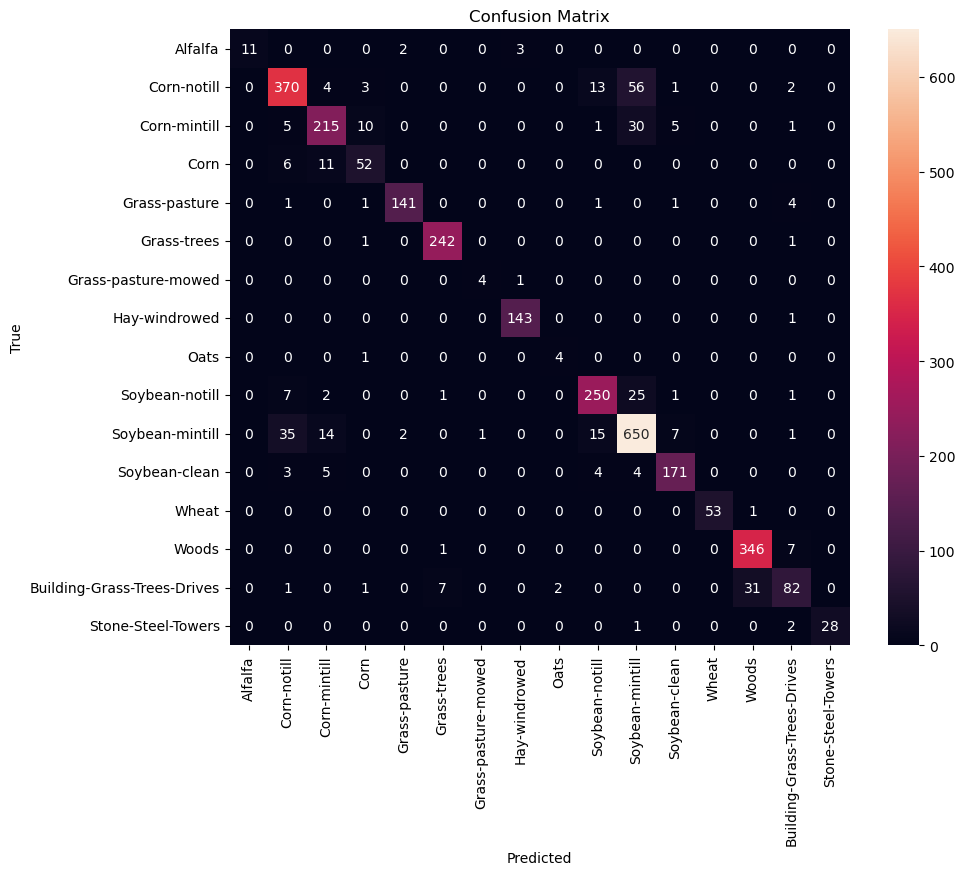

In [49]:
# confusion matrix
from sklearn.metrics import confusion_matrix

# Replace these with your actual ground truth and predicted labels
true_labels = y_test
predicted_labels = y_pred

# Create the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Define class labels (optional)
class_labels = ['Alfalfa','Corn-notill','Corn-mintill','Corn','Grass-pasture','Grass-trees','Grass-pasture-mowed','Hay-windrowed','Oats','Soybean-notill',
'Soybean-mintill','Soybean-clean','Wheat','Woods','Building-Grass-Trees-Drives','Stone-Steel-Towers']

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
# sns.set(font_scale=1.2)
# ns.set_style("whitegrid")
sns.heatmap(cm, annot=True, fmt="g", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ------------------------------------End-----------------------------------------

In [50]:
sorted(y_test.unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [51]:
y_test.value_counts()

11    725
2     449
14    354
10    287
3     267
6     244
12    187
5     149
8     144
15    124
4      69
13     54
16     31
1      16
9       5
7       5
Name: target, dtype: int64

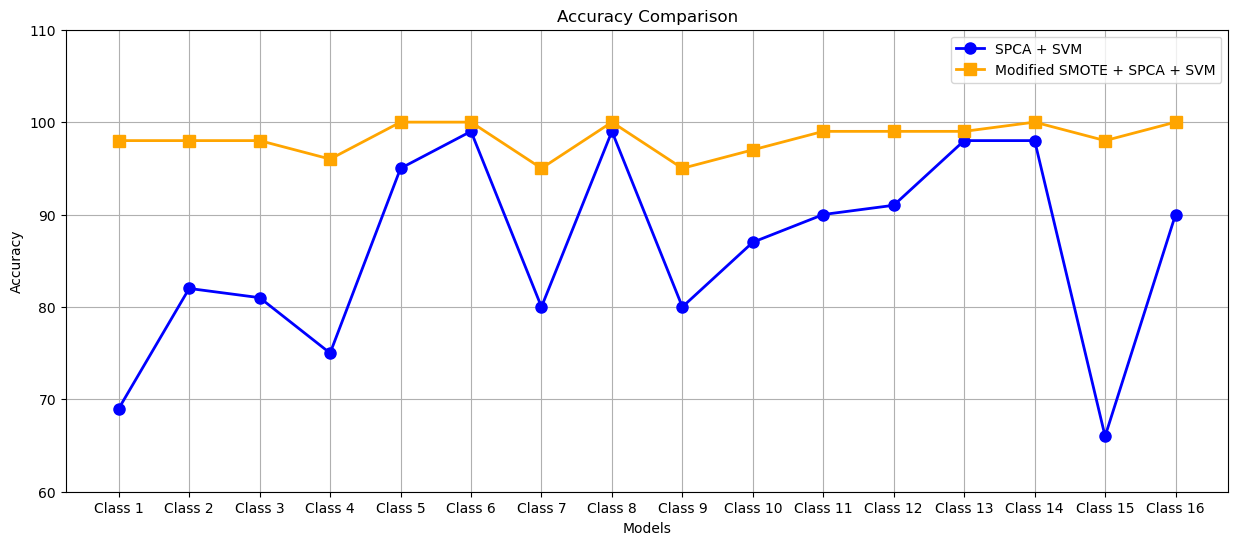

In [1]:
import matplotlib.pyplot as plt

# Sample data
categories = ['Class 1','Class 2','Class 3','Class 4','Class 5','Class 6','Class 7','Class 8','Class 9','Class 10',
 'Class 11','Class 12','Class 13','Class 14','Class 15','Class 16']
accuracies_1 = [69,82,81,75,95,99,80,99,80,87,90,91,98,98,66,90]
accuracies_2 = [98,98,98,96,100,100,95,100,95,97,99,99,99,100,98,100]

# Create a line graph with two lines
plt.figure(figsize=(15, 6))
plt.plot(categories, accuracies_1, marker='o', color='blue', linestyle='-', linewidth=2, markersize=8, label='SPCA + SVM')
plt.plot(categories, accuracies_2, marker='s', color='orange', linestyle='-', linewidth=2, markersize=8, label='Modified SMOTE + SPCA + SVM')

# Customize the plot
plt.title('Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.ylim(60, 110)

# Display the plot
plt.show()


In [52]:
# classification report
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred,labels=sorted(y_test.unique()))
print(report)

              precision    recall  f1-score   support

           1       1.00      0.69      0.81        16
           2       0.86      0.82      0.84       449
           3       0.86      0.81      0.83       267
           4       0.75      0.75      0.75        69
           5       0.97      0.95      0.96       149
           6       0.96      0.99      0.98       244
           7       0.80      0.80      0.80         5
           8       0.97      0.99      0.98       144
           9       0.67      0.80      0.73         5
          10       0.88      0.87      0.88       287
          11       0.85      0.90      0.87       725
          12       0.92      0.91      0.92       187
          13       1.00      0.98      0.99        54
          14       0.92      0.98      0.95       354
          15       0.80      0.66      0.73       124
          16       1.00      0.90      0.95        31

    accuracy                           0.89      3110
   macro avg       0.89   

In [53]:
class_accuracies = {}
class_sample_counts = {}

# Calculate per-class accuracy and sample counts
for class_label in set(y_test):
    class_indices = y_test == class_label
    class_accuracy = accuracy_score(y_test[class_indices], y_pred[class_indices])
    class_sample_count = sum(class_indices)
    class_accuracies[class_label] = class_accuracy
    class_sample_counts[class_label] = class_sample_count

# Print per-class accuracies and sample counts
print("Per-Class Accuracies and Sample Counts:")
for class_label, class_accuracy in class_accuracies.items():
    class_samples = class_sample_counts[class_label]
    print(f"Class {class_label}: Accuracy = {class_accuracy:.2f}, Samples = {class_samples}")

Per-Class Accuracies and Sample Counts:
Class 1: Accuracy = 0.69, Samples = 16
Class 2: Accuracy = 0.82, Samples = 449
Class 3: Accuracy = 0.81, Samples = 267
Class 4: Accuracy = 0.75, Samples = 69
Class 5: Accuracy = 0.95, Samples = 149
Class 6: Accuracy = 0.99, Samples = 244
Class 7: Accuracy = 0.80, Samples = 5
Class 8: Accuracy = 0.99, Samples = 144
Class 9: Accuracy = 0.80, Samples = 5
Class 10: Accuracy = 0.87, Samples = 287
Class 11: Accuracy = 0.90, Samples = 725
Class 12: Accuracy = 0.91, Samples = 187
Class 13: Accuracy = 0.98, Samples = 54
Class 14: Accuracy = 0.98, Samples = 354
Class 15: Accuracy = 0.66, Samples = 124
Class 16: Accuracy = 0.90, Samples = 31
